# Overfitting Example

Version 1.1

(C) 2020 - Umberto Michelucci, Michela Sperti

This notebook is part of the book _Applied Deep Learning: a case based approach, **2nd edition**_ from APRESS by [U. Michelucci](mailto:umberto.michelucci@toelt.ai) and [M. Sperti](mailto:michela.sperti@toelt.ai).

The purpose of this notebook is to give an intuitive idea of what is one of the most common problems that you will encounter when training deep neural networks: overfitting. Therefore, a practical example with a simple dataset generated specifically for this scope is provided.

## Notebook Learning Goals

At the end of this notebook you will have a clear and practical idea of what overfitting and underfitting are and why  feed-forward neural networks architectures can be more prone to this kind of issue.

## Libraries Import

This section contains the necessary libraries (such as tensorflow or pandas) you need to import to run the notebook.

In [ ]:
# general libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from scipy.optimize import curve_fit

In [ ]:
# Referring to the following cell, if you want to re-clone a repository
# inside the google colab instance, you need to delete it first. 
# You can delete the repositories contained in this instance executing 
# the following two lines of code (deleting the # comment symbol).

# !rm -rf ADL-Book-2nd-Ed 

In [ ]:
# This command actually clone the repository of the book in the google colab
# instance. In this way this notebook will have access to the modules
# we have written for this book.

# Please note that in case you have already run this cell, and you run it again
# you may get the error message:
#
# fatal: destination path 'ADL-Book-2nd-Ed' already exists and is not an empty directory.
# 
# In this case you can safely ignore the error message.

!git clone https://github.com/toelt-llc/ADL-Book-2nd-Ed.git

Cloning into 'ADL-Book-2nd-Ed'...
remote: Enumerating objects: 927, done.
remote: Total 927 (delta 0), reused 0 (delta 0), pack-reused 927
Receiving objects: 100% (927/927), 132.82 MiB | 35.23 MiB/s, done.
Resolving deltas: 100% (428/428), done.


In [ ]:
# This cell imports some custom written functions that we have created to 
# make the plotting easier. You don't need to undertsand the details and 
# you can simply ignore this cell.
# Simply run it with CMD+Enter (on Mac) or CTRL+Enter (Windows or Ubuntu) to
# import the necessary functions.

import sys
sys.path.append('ADL-Book-2nd-Ed/modules/')

from style_setting import set_style

## Dataset Generation

The dataset we are going to use is a two-dimensional dataset generated from a second-degree polynomial to which some random noise will be added. More specifically, the dataset is made of points described by two features each $(x_i,y_i)$, where $y_i$ is calculated with the following formula:

$$
1+2x_i+3x_i^2
$$

Then, additive noise will be added to each point by means of `np.random.normal` function.

In the following cell, you can find some functions that return the corresponding $y_i$ value, given $x_i$ and the polynomial's coefficients, for different degrees. We will use them later in the notebook.

In [ ]:
def func_0(p, a):
  """Zero-degree polynomial.""" 
  return a

def func_1(p, a, b):
  """One-degree polynomial."""
  return a+b*p

def func_2(p, a, b, c): 
  """Two-degree polynomial."""
  return a + b*p + c*p**2

def func_21(p, a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, q, r, s, t, u, v, x):
  """Twenty-one-degree polynomial."""
  return a + b*p + c*p**2 + d*p**3 + e*p**4 + f*p**5 + g*p**6 + h*p**7 + i*p**8 + j*p**9 + k*p**10 + l*p**11 + m*p**12 + n*p**13 + o*p**14 + q*p**15 + r*p**16 + s*p**17 + t*p**18 + u*p**19 + v*p**20 + x*p**21

Now, let us generate $(x_i,y_i)$ couples for a vector of points.

In [ ]:
x = np.arange(-5.0, 5.0, 0.05, dtype = np.float64) 
y = func_2(x, 1, 2, 3) + 18.0 * np.random.normal(0, 1, size = len(x))

The function `np.random.normal(0, 1, size = len(x))` generates a NumPy array of random values from a normal distribution of length `len(x)` with average 0 and standard deviation 1. 

Now let us inspect our data.

In [ ]:
# The following line contains the path to fonts that are used to plot result in
# a uniform way.

f = set_style().set_general_style_parameters()

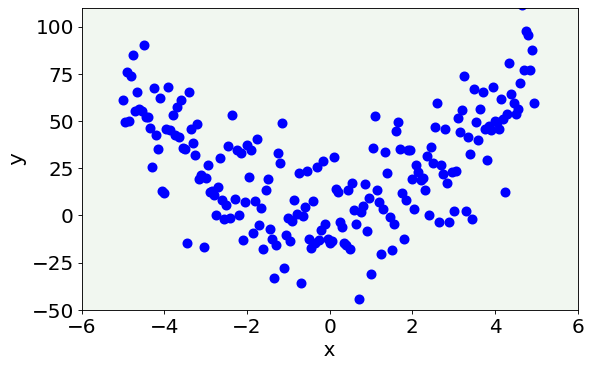

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(x, y, color = 'blue', linewidths = 3)

plt.ylabel('y', fontproperties = fm.FontProperties(fname = f))
plt.xlabel('x', fontproperties = fm.FontProperties(fname = f))

plt.ylim(-50, 110)
plt.xlim(-6, 6)

plt.axis(True)
#plt.savefig('overfitting_dataset.png', dpi = 300)
plt.show()

## Curve Fitting Example

In the following cells we are going to fit the generated data with different polynomials and try to understand which is the best choice, in terms of polynomial's degree, to approximate our data.

The general form of the polynomials is the following:

$$
f(x_i)=\sum_{j=0}^K a_jx_i^j
$$

and to determine the right polynomial's coefficients, which approximate a given distribution, the following mean square error must be minimized:

$$
\frac{1}{m}\sum_{i=1}^m (y_i - f(x_i))^2
$$

The function `curve_fit` will automatically minimize the standard error and find the best parameters for us. To use `curve_fit`, you need to import it from SciPy package (`from scipy.optimize import curve_fit`). To have more information about SciPy see the [Further Readings](#fr) section of this notebook.

### Case 1: Underfitting

We first try a first-degree polynomial.

In [ ]:
popt, pcov = curve_fit(func_1, x, y)

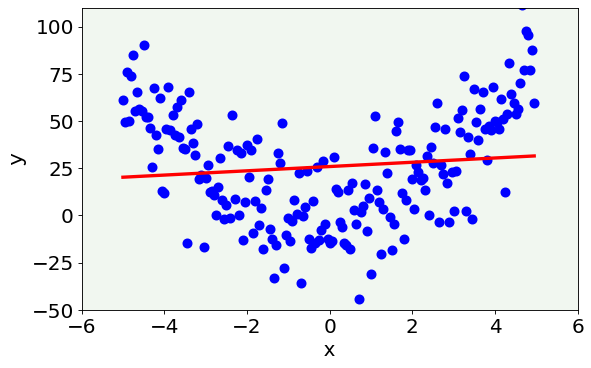

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(x, y, color = 'blue', linewidths = 3)
ax.plot(x, func_1(x, popt[0], popt[1]), lw = 3, color = 'red')

plt.ylabel('y', fontproperties = fm.FontProperties(fname = f))
plt.xlabel('x', fontproperties = fm.FontProperties(fname = f))

plt.ylim(-50, 110)
plt.xlim(-6, 6)

plt.axis(True)
#plt.savefig('too_simple.png', dpi = 300)
plt.show()

As you can see, the red line badly approximates our data distribution. More specifically, the model is too simple to capture the features of the data. This situation is the so-called **underfitting** phenomenon, meaning that the model is too simple to describe the dataset and suffers from **high bias**.

### Case 2: Overfitting

In [ ]:
popt, pcov = curve_fit(func_21, x, y)

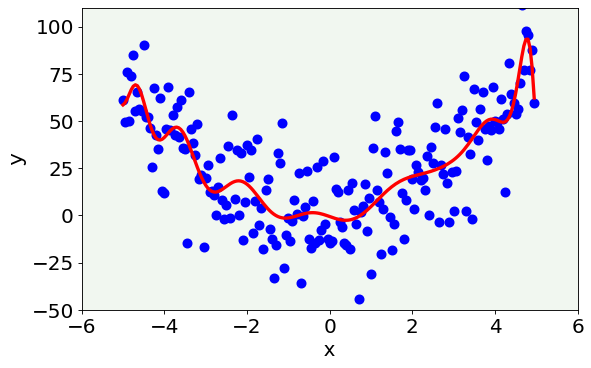

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(x, y, color = 'blue', linewidths = 3)
ax.plot(x, func_21(x, *popt), lw = 3, color = 'red')

plt.ylabel('y', fontproperties = fm.FontProperties(fname = f))
plt.xlabel('x', fontproperties = fm.FontProperties(fname = f))

plt.ylim(-50, 110)
plt.xlim(-6, 6)

plt.axis(True)
#plt.savefig('too_complex.png', dpi = 300)
plt.show()

This second case is the opposite with respect to the previous one: the model is too complex and shows features that we know are not present and wrong (since we created our data). The model is so flexible that captures the random variability that we have introduced with noise. In this case we talk about **overfitting**. It is easy to understand that this generalizes quite badly. If we would apply this 21-degree polynomial model to new data it would not work well, since the random noise would be different in new data and so the oscillations would make no sense on new data. This is the case of **high variance** of the model.


### Case 3: The Right Compromise between Bias and Variance

In [ ]:
popt, pcov = curve_fit(func_2, x, y)

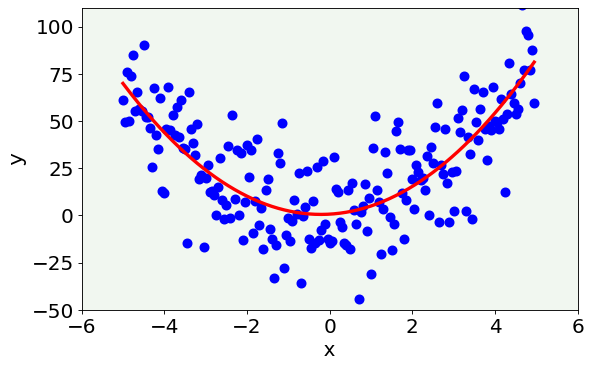

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(x, y, color = 'blue', linewidths = 3)
ax.plot(x, func_2(x, *popt), lw = 3, color = 'red')

plt.ylabel('y', fontproperties = fm.FontProperties(fname = f))
plt.xlabel('x', fontproperties = fm.FontProperties(fname = f))

plt.ylim(-50, 110)
plt.xlim(-6, 6)

plt.axis(True)
#plt.savefig('right.png', dpi = 300)
plt.show()

This last case represents the best model. As you can see from the figure, it correctly represents the data without being too simple neither too complex. Therefore, it is a good compromise between bias and variance.

### More on overfitting <a name = "mo"></a>

Another way to understand how overfitting works is to plot the best 21-degree polynomial models obtained by fitting data generated with 10 different random noise values added. See the figure below.

In [ ]:
yy = []
poptl = []
for i in range (0, 10):
    np.random.seed(seed = i)
    yy.append(func_2(x, 1, 2, 3) + 18.0 * np.random.normal(0, 1, size = len(x)))
    popt, _ = curve_fit(func_21, x, yy[i])
    poptl.append(popt)

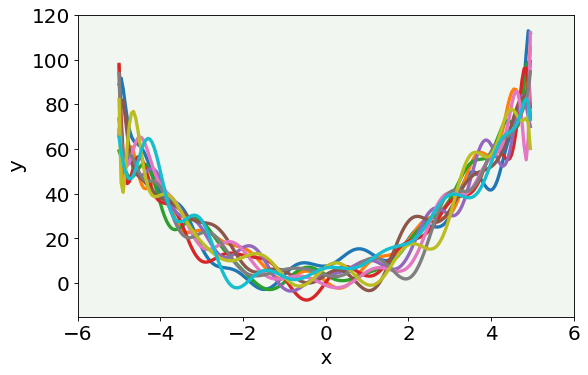

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(0, 10):
    ax.plot(x, func_21(x, *poptl[i]),  lw = 3)

plt.ylabel('y', fontproperties = fm.FontProperties(fname = f))
plt.xlabel('x', fontproperties = fm.FontProperties(fname = f))

plt.ylim(-15, 120)
plt.xlim(-6, 6)

plt.axis(True)
#plt.savefig('models.png', dpi = 300)
plt.show()

As you can notice, the 10 models are different from each other (therefore, the 21-degree model is not stable). In fact, in each case, the model adapts itself to the random obscillations present inside the dataset (which are never the same) and it is strongly dependent on the noise.

Let us perform the same calculations, but using the linear model.

In [ ]:
yy = []
poptl = []
for i in range (0, 10):
    np.random.seed(seed = i)
    yy.append(func_2(x, 1, 2, 3) + 18.0 * np.random.normal(0, 1, size = len(x)))
    popt, _ = curve_fit(func_1, x, yy[i])
    poptl.append(popt)

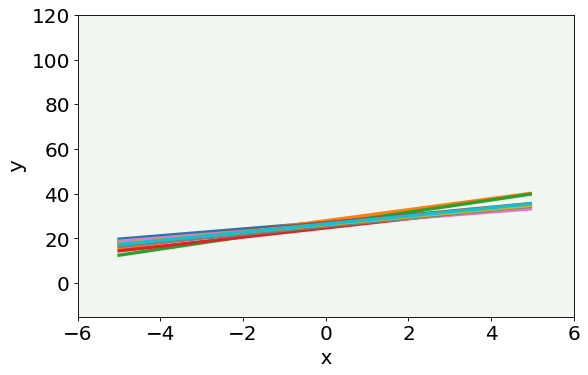

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(0, 10):
    ax.plot(x, func_1(x, *poptl[i]),  lw=3)

plt.ylabel('y', fontproperties = fm.FontProperties(fname = f))
plt.xlabel('x', fontproperties = fm.FontProperties(fname = f))

plt.ylim(-15, 120)
plt.xlim(-6, 6)

plt.axis(True)
#plt.savefig('models2.png', dpi = 300)
plt.show()

Here you can see that the linear model is more stable than the high order one. However, the linear model, as we have already saw, misses the main features of the data.

In this notebook we saw what overfitting and underfitting mean, in a practical example. 

To recap, overfitting happens when your model extracts noise from data as if it were an important feature of the dataset itself. In this situation, the model can perform incredibly well on the training dataset, but poorly on the test dataset. The reason for this is that the noise vary between different datasets, as you can see in the plots from the [last notebook's section](#mo).

The opposite of overfitting is underfitting and it happens when the model cannot capture the main features of the data.

Since neural networks are not transparent models and results cannot be easily visualized, the only way to detect overfitting is by splitting our dataset in different parts and evaluating some metrics on all of them.

## Further Readings <a name = "fr"></a>

**SciPy package**

1. All documentation (with lots of tutorial and examples already implemented): https://docs.scipy.org/doc/scipy/reference/index.html#